In [21]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Loading data
file_path = Path('../Data/austin_house_listings.csv')
df = pd.read_csv(file_path)
df = df[df['ListPrice'] != 0]
df = df.drop('Unnamed: 0', axis=1)
df.head(10)

,BedroomsTotal,FireplacesTotal,ViewYN,GarageYN,ListPrice,AssociationYN,StreetNumber,AttachedGarageYN,PoolPrivateYN,BathroomsFull,...,Utilities_1,Utilities_2,Utilities_3,ConstructionMaterials_0,ConstructionMaterials_1,ConstructionMaterials_2,ConstructionMaterials_3,ConstructionMaterials_4,ConstructionMaterials_5,UnparsedAddress
9,2,1,0,0,200000,1,12212,1,0,2,...,1,0,0,1,1,1,1,0,0,"12212 Brigadoon LN # 147, Austin TX 78727"
17,2,1,0,0,100000,1,1202,0,0,2,...,1,0,0,1,0,0,0,0,0,"1202 Thorpe LN # 712, San Marcos TX 78666"
18,3,0,1,1,200000,1,2404,0,0,2,...,1,1,0,1,1,1,1,0,0,"2404 Claret CV, Austin TX 78748"
23,1,0,1,1,400000,1,210,0,1,1,...,1,0,0,1,0,0,0,0,0,"210 Lavaca ST # 3109, Austin TX 78701"
35,3,0,0,1,500000,1,2612,0,0,2,...,1,1,0,1,0,0,0,0,0,"2612 12th ST # 305, Austin TX 78703"
36,5,1,0,1,800000,1,1036,1,0,3,...,1,0,0,1,0,0,0,0,0,"1036 Liberty Park DR # 20, Austin TX 78746"
43,3,2,0,0,300000,1,4332,1,0,3,...,1,0,0,1,1,1,0,0,0,"4332 Teravista Club DR # 26, Round Rock TX 78665"
45,3,1,0,0,100000,1,8914,1,0,2,...,0,0,0,1,0,0,0,0,0,"8914 N Plaza CT # 64, Austin TX 78753"
48,2,1,0,0,200000,1,1405,0,0,2,...,0,0,0,1,1,1,0,0,0,"1405 Bridgeway DR # A, Austin TX 78704"
51,2,1,0,1,300000,1,1408,1,0,2,...,1,0,0,1,1,0,0,0,0,"1408 North ST # 1, Austin TX 78756"


In [23]:
Address = df.pop('UnparsedAddress')

In [24]:
# Standarize data with StandarScaler
data_scaled = StandardScaler().fit_transform(df)
print(data_scaled[0:5])

[[-7.95125148e-02  7.60574459e-01 -8.97709504e-01 -6.21063723e-01
   1.04384264e-02  6.95048047e-01  1.71425421e+00  1.35214948e+00
  -4.51576758e-01  4.32079786e-01 -2.27370382e-01 -2.91977609e-02
  -2.97214449e-02  1.49682302e-01 -3.44367236e-02  7.54602364e-03
   1.28470430e+00 -2.91977609e-02 -3.12816810e-01  1.07676091e+00
   1.31676632e+00  8.67705832e-02 -2.69889039e-02  7.54602364e-03
  -1.13566811e-01 -1.25056378e-01  1.28671253e-01 -2.98186576e-02
  -1.72107098e-02  1.52752523e-01 -1.72107098e-02 -8.28099245e-02
  -8.09776330e-02 -9.30692629e-02 -1.72107098e-02  7.13397891e-01
  -2.43432248e-02 -1.72107098e-02 -1.72107098e-02 -2.98186576e-02
  -1.52752523e-01 -6.21646772e-02 -2.43432248e-02 -2.04061173e-01
  -8.46036002e-02 -1.72107098e-02 -1.72107098e-02 -9.93399268e-02
  -2.30949112e-01 -1.72107098e-02 -1.78255799e-01 -1.06680143e-01
  -4.21887103e-02 -4.55757758e-02 -2.43432248e-02 -5.44977336e-02
  -2.20811603e-01 -3.08231220e-01 -8.63610670e-02 -1.72107098e-02
  -2.43432

In [25]:
#sns.heatmap(pd.DataFrame(data_scaled).corr())

Text(0, 0.5, 'cumulative explained variance')

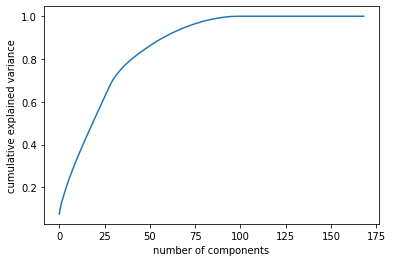

In [26]:
pca = PCA().fit(data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

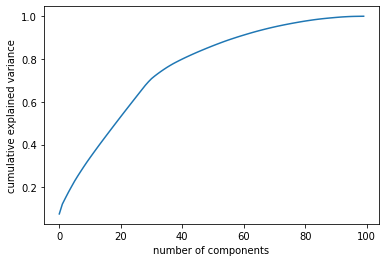

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:100])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [28]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=90)

# Get principal components
data_pca = pca.fit_transform(data_scaled)

In [29]:
df_pca = pd.DataFrame(data=data_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-1.319338,0.339406,-0.467952,0.193170,0.252015,-0.744200,0.911780,-1.765917,0.473717,-0.764735,...,-1.419587,-0.224927,1.326464,-0.334156,-0.412099,0.225332,0.299540,-0.410540,-0.376403,0.183567
1,-0.428386,-0.053590,2.185045,-1.338488,-0.507228,2.409290,-2.239557,3.318485,-0.434877,3.583410,...,0.271780,-0.108988,0.443030,0.148694,-0.595877,-0.048057,0.488661,-0.228597,0.310070,-0.143420
2,-1.700903,1.892028,-2.461854,0.873752,-0.839371,0.880589,0.183369,-1.187338,0.326162,-0.612510,...,-1.795023,0.545755,0.728191,0.050300,0.403666,-0.044654,-0.463511,-0.240645,0.228376,0.508639
3,1.564038,-2.739900,-0.053794,0.184864,0.867776,-2.141098,0.747843,-0.061371,-0.119949,-0.376874,...,0.426437,0.390633,0.082188,0.075711,0.057815,-0.295765,-0.406942,0.255408,0.187710,-0.023779
4,-1.221240,1.968402,-3.352480,1.268992,-1.089954,1.149274,-0.266464,-0.009092,0.473056,-0.818625,...,0.017730,0.291304,-1.243375,-0.981614,0.198910,-0.177097,1.109514,0.888286,0.098221,0.902611


In [31]:
# Finding the best value for k
inertia = []
k = list(range(1, 101))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [32]:
# Predicting clusters 

# Initialize the K-Means model
model = KMeans(n_clusters=35, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class columns
df_pca["class"] = model.labels_
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,class
0,-1.319338,0.339406,-0.467952,0.193170,0.252015,-0.744200,0.911780,-1.765917,0.473717,-0.764735,...,-0.224927,1.326464,-0.334156,-0.412099,0.225332,0.299540,-0.410540,-0.376403,0.183567,33
1,-0.428386,-0.053590,2.185045,-1.338488,-0.507228,2.409290,-2.239557,3.318485,-0.434877,3.583410,...,-0.108988,0.443030,0.148694,-0.595877,-0.048057,0.488661,-0.228597,0.310070,-0.143420,5
2,-1.700903,1.892028,-2.461854,0.873752,-0.839371,0.880589,0.183369,-1.187338,0.326162,-0.612510,...,0.545755,0.728191,0.050300,0.403666,-0.044654,-0.463511,-0.240645,0.228376,0.508639,33
3,1.564038,-2.739900,-0.053794,0.184864,0.867776,-2.141098,0.747843,-0.061371,-0.119949,-0.376874,...,0.390633,0.082188,0.075711,0.057815,-0.295765,-0.406942,0.255408,0.187710,-0.023779,4
4,-1.221240,1.968402,-3.352480,1.268992,-1.089954,1.149274,-0.266464,-0.009092,0.473056,-0.818625,...,0.291304,-1.243375,-0.981614,0.198910,-0.177097,1.109514,0.888286,0.098221,0.902611,1


In [33]:
#df_pca.groupby(by = 'class').describe()

In [34]:
df['class'] = df_pca['class']
df.head()

,BedroomsTotal,FireplacesTotal,ViewYN,GarageYN,ListPrice,AssociationYN,StreetNumber,AttachedGarageYN,PoolPrivateYN,BathroomsFull,...,Utilities_1,Utilities_2,Utilities_3,ConstructionMaterials_0,ConstructionMaterials_1,ConstructionMaterials_2,ConstructionMaterials_3,ConstructionMaterials_4,ConstructionMaterials_5,class
9,2,1,0,0,200000,1,12212,1,0,2,...,1,0,0,1,1,1,1,0,0,33.0
17,2,1,0,0,100000,1,1202,0,0,2,...,1,0,0,1,0,0,0,0,0,28.0
18,3,0,1,1,200000,1,2404,0,0,2,...,1,1,0,1,1,1,1,0,0,1.0
23,1,0,1,1,400000,1,210,0,1,1,...,1,0,0,1,0,0,0,0,0,5.0
35,3,0,0,1,500000,1,2612,0,0,2,...,1,1,0,1,0,0,0,0,0,34.0


In [39]:
df.columns.to_list()

['BedroomsTotal',
 'FireplacesTotal',
 'ViewYN',
 'GarageYN',
 'ListPrice',
 'AssociationYN',
 'StreetNumber',
 'AttachedGarageYN',
 'PoolPrivateYN',
 'BathroomsFull',
 'WaterfrontYN',
 'LotSizeAcres',
 'LotSizeDimensions',
 'YearBuilt',
 'HorseYN',
 'LivingArea',
 'BathroomsHalf',
 'LotSizeArea',
 'NewConstructionYN',
 'BathroomsTotalInteger',
 'GarageSpaces',
 'AssociationFee',
 'LotSizeSquareFeet',
 'BuildingAreaTotal',
 'neutral',
 'PropertyType_Land',
 'PropertyType_Residential',
 'PropertyType_Residential Lease',
 'PropertySubType_Apartment',
 'PropertySubType_Condominium',
 'PropertySubType_Manufactured Home',
 'PropertySubType_Multi Lots (Adjacent)',
 'PropertySubType_Single Family Residence',
 'PropertySubType_Single Lot',
 'PropertySubType_Townhouse',
 'HighSchoolDistrict_Austin ISD',
 'HighSchoolDistrict_Bastrop ISD',
 'HighSchoolDistrict_Burnet ISD',
 'HighSchoolDistrict_Cameron ISD',
 'HighSchoolDistrict_Comal ISD',
 'HighSchoolDistrict_Del Valle ISD',
 'HighSchoolDistrict

In [44]:
target_questions = ['class', 'ListPrice', 'BedroomsTotal', 'BathroomsTotalInteger', 'BuildingAreaTotal']

In [45]:
df2 = df[target_questions].groupby(by = 'class').describe()[:]

In [47]:
df2.to_csv('../Data/jeffery_data.csv')